# Illustrate the Molecular Oncology Almanac
We wish to make a couple of figures that shows how the database breaks down by evidence category and by therapy type. We could put these two data types together but I think that it gets crowded.

In [1]:
import glob
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import sys

sys.path.append('../../../common/')
import settings
settings.set_arial_as_font()
colors = settings.Colors
tableau = colors.tableau10

MOALMANAC_PATH = '../moalmanac-db/content/*'

%matplotlib inline

In [2]:
handles = glob.glob(MOALMANAC_PATH)
almanac = []

columns = ['disease', 'context', 'oncotree_term', 'oncotree_code', 
          'therapy_name', 'therapy_type', 
           'therapy_sensitivity', 'therapy_resistance', 'favorable_prognosis',
          'predictive_implication', 'description', 'source_type', 
           'citation', 'url', 'doi', 'pmid', 'nct', 'last_updated']

for handle in handles:
    dtype = handle.split('/')[-1].split('.tsv')[0]
    tmp = pd.read_csv(handle, sep='\t')
    tmp['dtype'] = dtype
    almanac.append(tmp.loc[:, columns])
    
almanac = pd.concat(almanac, ignore_index=True)

# Our database has a few items related to adverse event risk, but we focus on sensitivity, resistance, and prognosis
# for the paper
counts = almanac.loc[:, ['therapy_sensitivity', 'therapy_resistance', 'favorable_prognosis']].notnull().sum(axis=1)
almanac = almanac[~counts.eq(0)]

In [5]:
almanac['source_type'].value_counts()

Journal      442
Guideline    188
FDA          155
Abstract       5
Name: source_type, dtype: int64

## Counts of sensitivity, resistance, and prognosis


In [3]:
for column in ['therapy_sensitivity', 'therapy_resistance', 'favorable_prognosis']:
    print(almanac[column].value_counts().sum())
    print()

502

104

184



In [4]:
almanac[~almanac['therapy_sensitivity'].isnull()]

,disease,context,oncotree_term,oncotree_code,therapy_name,therapy_type,therapy_sensitivity,therapy_resistance,favorable_prognosis,predictive_implication,description,source_type,citation,url,doi,pmid,nct,last_updated
4,Colorectal Cancer,NaN,Colorectal Adenocarcinoma,COADREAD,Olaparib,Targeted therapy,1.0,NaN,NaN,Preclinical,SK-CO-1 cells are homozygous for ATM c.2251-10...,Journal,"Wang C, Jette N, Moussienko D, Bebb DG, Lees-M...",https://doi.org/10.1016/j.tranon.2017.01.007,10.1016/j.tranon.2017.01.007,28182994.0,NaN,8/15/19
11,Ovarian Cancer,"Advanced, treated with three or more prior lin...",Ovarian Epithelial Tumor,OVT,Niraparib,Targeted therapy,1.0,NaN,NaN,FDA-Approved,The U.S. Food and Drug Administration (FDA) gr...,FDA,GlaxoSmithKline. Zejula (niraparib) [package i...,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,NaN,NaN,10/15/20
12,Fallopian tube cancer,Treated with three or more prior lines of chem...,High-Grade Serous Fallopian Tube Cancer,HGSFT,Niraparib,Targeted therapy,1.0,NaN,NaN,FDA-Approved,The U.S. Food and Drug Administration (FDA) gr...,FDA,GlaxoSmithKline. Zejula (niraparib) [package i...,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,NaN,NaN,10/15/20
13,Peritoneal cancer,"Primary, treated with three or more prior line...",Peritoneal Serous Carcinoma,PSEC,Niraparib,Targeted therapy,1.0,NaN,NaN,FDA-Approved,The U.S. Food and Drug Administration (FDA) gr...,FDA,GlaxoSmithKline. Zejula (niraparib) [package i...,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,NaN,NaN,10/15/20
14,Breast Cancer,"HER2-negative, metastatic, treated with chemot...",Invasive Breast Carcinoma,BRCA,Olaparib,Targeted therapy,1.0,NaN,NaN,FDA-Approved,The U.S. Food and Drug Administration (FDA) gr...,FDA,"AstraZeneca Pharmaceuticals, LP. Lynparza (ola...",https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,NaN,NaN,11/12/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Ovarian Cancer,NaN,"Ovarian Cancer, Other",OOVC,Pictilisib,Targeted therapy,1.0,NaN,NaN,Clinical trial,"A heavily-pretreated, platinum-refractory ovar...",Journal,"Sarker D, Ang JE, Baird R, et al. First-in-hum...",https://doi.org/10.1158/1078-0432.CCR-14-0947,10.1158/1078-0432.CCR-14-0947,25370471.0,NCT00876122,1/29/19
784,NaN,Metastatic,NaN,NaN,AZD8186,Targeted therapy,1.0,NaN,NaN,Preclinical,PTEN loss of function may confer sensitivity t...,Journal,"Barlaam B, Cosulich S, Degorce S, et al. Disco...",https://doi.org/10.1021/jm501629p,10.1021/jm501629p,25514658.0,NaN,3/16/17
786,Pancreatic Cancer,NaN,Pancreatic Adenocarcinoma,PAAD,Everolimus,Targeted therapy,1.0,NaN,NaN,Preclinical,PTEN loss in the setting of KRAS G12D mutation...,Journal,"Morran DC, Wu J, Jamieson NB, et al. Targeting...",https://doi.org/10.1136/gutjnl-2013-306202,10.1136/gutjnl-2013-306202,24717934.0,NaN,3/7/19
789,Renal clear cell carcinoma,Advanced,Renal Clear Cell Carcinoma,RCC,Everolimus,Targeted therapy,1.0,NaN,NaN,Inferential,In a study of everolimus-treated patients with...,Journal,"Voss MH, Chen D, Reising A, et al. PTEN Expres...",https://doi.org/10.1158/1078-0432.CCR-18-1833,10.1158/1078-0432.CCR-18-1833,30327302.0,NCT00903175,8/12/19


In [5]:
almanac[~almanac['therapy_sensitivity'].isnull() & ~almanac['therapy_resistance'].isnull()]

,disease,context,oncotree_term,oncotree_code,therapy_name,therapy_type,therapy_sensitivity,therapy_resistance,favorable_prognosis,predictive_implication,description,source_type,citation,url,doi,pmid,nct,last_updated


## Predictive Implication

In [6]:
almanac['predictive_implication'].value_counts()

Guideline            186
Clinical evidence    168
FDA-Approved         150
Inferential          120
Preclinical          120
Clinical trial        46
Name: predictive_implication, dtype: int64

In [7]:
order = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence', 'Preclinical', 'Inferential']
values = almanac['predictive_implication'].value_counts()
values = values.loc[order]

values.rename(index={'FDA-Approved': 'FDA'}, inplace=True)

evidence = values.copy(deep=True)
n = almanac.shape[0]

In [8]:
n

790

## Therapy type

In [9]:
almanac['therapy_type_short'] = almanac['therapy_type'].str.split(' ', expand=True).loc[:, 0]
values = almanac['therapy_type_short'].value_counts()

order = ['Targeted', 'Immunotherapy', 'Chemotherapy', 'Radiation', 'Hormone', 'Combination']
values = values.loc[order]
therapy_types = values.copy(deep=True)

sum_types = therapy_types.sum()

In [10]:
almanac[~almanac['favorable_prognosis'].isnull() & ~almanac['therapy_type'].isnull()]

,disease,context,oncotree_term,oncotree_code,therapy_name,therapy_type,therapy_sensitivity,therapy_resistance,favorable_prognosis,predictive_implication,description,source_type,citation,url,doi,pmid,nct,last_updated,therapy_type_short


## Side-by-side figure
We plot the predictive implication and therapy types side by side

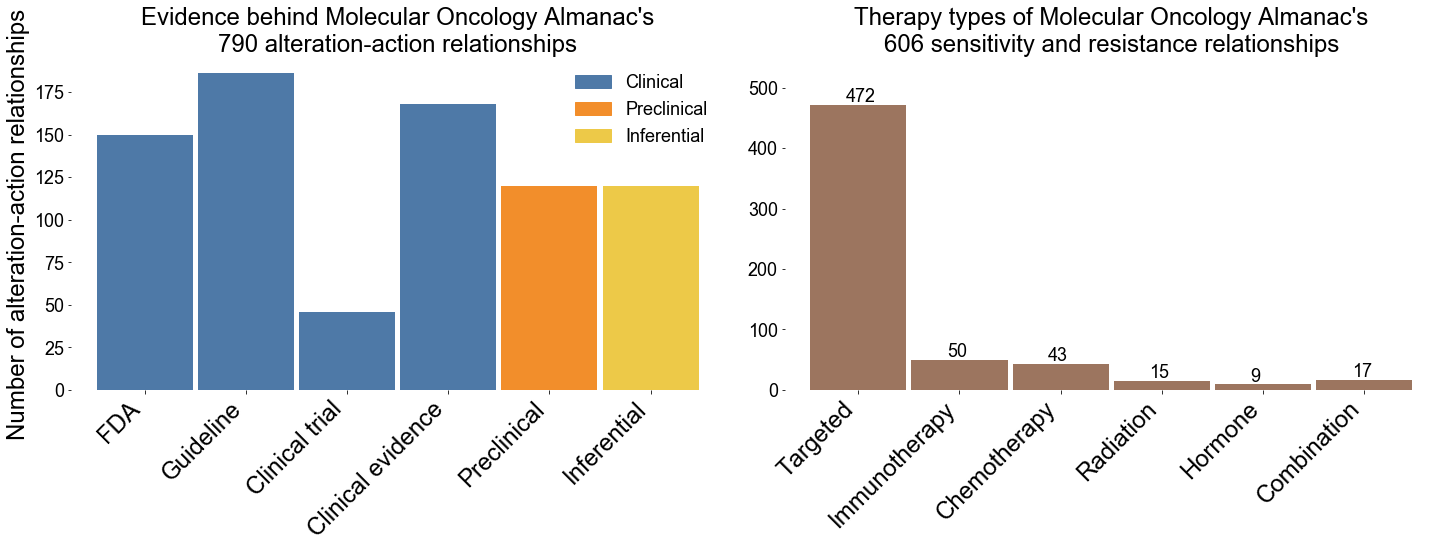

In [11]:
size_title = 24
size_ylabel = 24
size_xlabel = 24
size_yticks = 18
size_legend = 18

fig = plt.figure(constrained_layout = True, figsize=(20, 7.5))

gs = GridSpec(1,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
p1 = evidence.plot.bar(width=0.95, 
                       color=[tableau['blue'], tableau['blue'], tableau['blue'], 
                              tableau['blue'], tableau['orange'], tableau['yellow']], 
                       ax=ax1)
title = "Evidence behind Molecular Oncology Almanac's\n{} alteration-action relationships".format(n)
ylabel = "Number of alteration-action relationships"

clinical = patches.Patch(color=tableau['blue'], label='Clinical')
preclinical = patches.Patch(color=tableau['orange'], label='Preclinical')
inferential = patches.Patch(color=tableau['yellow'], label='Inferential')

plt.legend(handles=[clinical, preclinical, inferential], loc=1, fontsize=size_legend, frameon=False)

plt.title(title, fontsize=size_title)
plt.ylabel(ylabel, fontsize=size_ylabel)
plt.xticks(fontsize=size_xlabel, rotation=45, ha='right')
plt.yticks(fontsize=size_yticks)

ax2 = fig.add_subplot(gs[0, 1])
p2 = therapy_types.plot.bar(width=0.95, color=[tableau['brown']], ax=ax2)

title = "Therapy types of Molecular Oncology Almanac's\n{} sensitivity and resistance relationships".format(sum_types)
ylabel = "Number of alteration-action relationships"

plt.title(title, fontsize=size_title)
# plt.ylabel(ylabel, fontsize=size_ylabel) # Hiding ylabel since it is the same as the left figure
plt.xticks(fontsize=size_xlabel, rotation=45, ha='right')
plt.yticks(fontsize=size_yticks)
plt.ylim([0, 550])

for patch in ax2.patches:
    x = patch.get_x()
    height = patch.get_height()
    ax2.text(x+0.35, 
             height+5,
            '{}'.format(round(height)), 
             color='k',
             fontsize=size_yticks
            )

for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
filename = 'figure-1-c'
folder = f'../../../figures/figure-01-c/'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight')    

plt.show()

In [13]:
import openpyxl
with pd.ExcelWriter(f'{folder}/{filename}.xlsx') as writer:  
    (evidence
     .to_frame()
     .reset_index()
     .rename(columns={'index': 'evidence', 'predictive_implication': 'counts'})
     .to_excel(writer, sheet_name='moalmanac evidence counts', index=False)
    )
    (therapy_types
     .to_frame()
     .reset_index()
     .rename(columns={'index': 'therapy type', 'therapy_type_short': 'counts'})
     .to_excel(writer, sheet_name='moalmanac therapy type counts', index=False)
    )